In [31]:
import requests
%matplotlib inline

In [18]:
url = \
    'https://iapi.bot.or.th/Stat/Stat-ReferenceRate/DAILY_REF_RATE_V1/'
querystring = {'start_period': '2017-09-01', 'end_period': '2017-09-15'}
headers = {'api-key': 'U9G1L457H6DCugT7VmBaEacbHV9RX0PySO05cYaGsm'}
response = requests.request('GET', url, headers=headers,
                            params=querystring)

In [19]:
response.text 

'{"result":{"success":"true","api":"Daily Weighted-average Interbank Exchange Rate - THB / USD","timestamp":"2017-09-24 09:31:15","data":{"data_header":{"report_name_eng":"Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)","report_name_th":"อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)","report_uoq_name_eng":"(Unit : Baht / 1 Unit of Foreign Currency)","report_uoq_name_th":"(หน่วย : บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)","report_source_of_data":[{"source_of_data_eng":"Bank of Thailand","source_of_data_th":"ธนาคารแห่งประเทศไทย"}],"report_remark":[],"last_updated":"2017-09-22"},"data_detail":[{"period":"2017-09-15","rate":"33.0670000"},{"period":"2017-09-14","rate":"33.1190000"},{"period":"2017-09-13","rate":"33.0870000"},{"period":"2017-09-12","rate":"33.1170000"},{"period":"2017-09-11","rate":"33.1280000"},{"period":"2017-09-08","rate":"33.0680000"},{"period":"2017-09-07","rate":"33.1260000"},{"period":"2017-09-06","rate":"33.1650000"},{"peri

In [20]:
import pandas as pd

In [21]:
j=pd.io.json.loads(response.text)
print(type(j))
j

<class 'dict'>


{'result': {'api': 'Daily Weighted-average Interbank Exchange Rate - THB / USD',
  'data': {'data_detail': [{'period': '2017-09-15', 'rate': '33.0670000'},
    {'period': '2017-09-14', 'rate': '33.1190000'},
    {'period': '2017-09-13', 'rate': '33.0870000'},
    {'period': '2017-09-12', 'rate': '33.1170000'},
    {'period': '2017-09-11', 'rate': '33.1280000'},
    {'period': '2017-09-08', 'rate': '33.0680000'},
    {'period': '2017-09-07', 'rate': '33.1260000'},
    {'period': '2017-09-06', 'rate': '33.1650000'},
    {'period': '2017-09-05', 'rate': '33.1730000'},
    {'period': '2017-09-04', 'rate': '33.1820000'},
    {'period': '2017-09-01', 'rate': '33.1830000'}],
   'data_header': {'last_updated': '2017-09-22',
    'report_name_eng': 'Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)',
    'report_name_th': 'อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)',
    'report_remark': [],
    'report_source_of_data': [{'source_of_data_eng': '

In [22]:
j['result']['data']['data_detail']

[{'period': '2017-09-15', 'rate': '33.0670000'},
 {'period': '2017-09-14', 'rate': '33.1190000'},
 {'period': '2017-09-13', 'rate': '33.0870000'},
 {'period': '2017-09-12', 'rate': '33.1170000'},
 {'period': '2017-09-11', 'rate': '33.1280000'},
 {'period': '2017-09-08', 'rate': '33.0680000'},
 {'period': '2017-09-07', 'rate': '33.1260000'},
 {'period': '2017-09-06', 'rate': '33.1650000'},
 {'period': '2017-09-05', 'rate': '33.1730000'},
 {'period': '2017-09-04', 'rate': '33.1820000'},
 {'period': '2017-09-01', 'rate': '33.1830000'}]

In [23]:
df=pd.DataFrame(j['result']['data']['data_detail'])

In [24]:
df

,period,rate
0,2017-09-15,33.0670000
1,2017-09-14,33.1190000
2,2017-09-13,33.0870000
3,2017-09-12,33.1170000
4,2017-09-11,33.1280000
5,2017-09-08,33.0680000
6,2017-09-07,33.1260000
7,2017-09-06,33.1650000
8,2017-09-05,33.1730000
9,2017-09-04,33.1820000


In [25]:
df.dtypes

period    object
rate      object
dtype: object

In [26]:
df.period=pd.to_datetime(df.period)
df.rate=pd.to_numeric(df.rate)
df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

In [27]:
df.set_index('period', inplace=True)

In [28]:
df

,rate
period,
2017-09-15,33.067
2017-09-14,33.119
2017-09-13,33.087
2017-09-12,33.117
2017-09-11,33.128
2017-09-08,33.068
2017-09-07,33.126
2017-09-06,33.165
2017-09-05,33.173


In [29]:
df=df.sort_index()

In [30]:
df

,rate
period,
2017-09-01,33.183
2017-09-04,33.182
2017-09-05,33.173
2017-09-06,33.165
2017-09-07,33.126
2017-09-08,33.068
2017-09-11,33.128
2017-09-12,33.117
2017-09-13,33.087


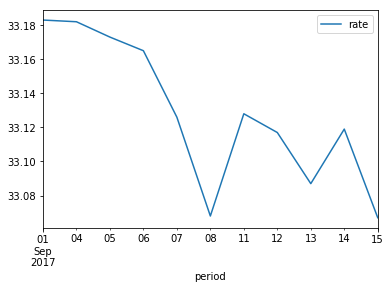

In [32]:
df.plot()